In [1]:
# 
# We undergo an sentiment analysis on the tweets of Elon Musk 
# from 2010 to 2017 which can be found in the following link:
# https://www.kaggle.com/kingburrito666/elon-musk-tweets
#
# We adop textblob for doing this task. This gives the rating of
# polarity from -1 to 1.
#
# Then, we study the time series of polarity based on ARIMA analysis.
#

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('elonmusk_tweets.csv')

In [4]:
df.head()

,id,created_at,text
0,849636868052275200,2017-04-05 14:56:29,b'And so the robots spared humanity ... https:...
1,848988730585096192,2017-04-03 20:01:01,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exa..."
2,848943072423497728,2017-04-03 16:59:35,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'"
3,848935705057280001,2017-04-03 16:30:19,b'Stormy weather in Shortville ...'
4,848416049573658624,2017-04-02 06:05:23,"b""@DaveLeeBBC @verge Coal is dying due to nat ..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2819 entries, 0 to 2818
Data columns (total 3 columns):
id            2819 non-null int64
created_at    2819 non-null object
text          2819 non-null object
dtypes: int64(1), object(2)
memory usage: 66.1+ KB


# Text Preprocessing

In [6]:
df['Clean'] =  df['text'].str.replace(r'(^b|@\w+|\W|https[\W\w]+|\d)',' ')

In [7]:
df.head()

,id,created_at,text,Clean
0,849636868052275200,2017-04-05 14:56:29,b'And so the robots spared humanity ... https:...,And so the robots spared humanity
1,848988730585096192,2017-04-03 20:01:01,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exa...",Exactly Tesla is absurdly overvalue...
2,848943072423497728,2017-04-03 16:59:35,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'",Et tu Walt
3,848935705057280001,2017-04-03 16:30:19,b'Stormy weather in Shortville ...',Stormy weather in Shortville
4,848416049573658624,2017-04-02 06:05:23,"b""@DaveLeeBBC @verge Coal is dying due to nat ...",Coal is dying due to nat gas fracking I...


In [8]:
from nltk.corpus import stopwords

In [9]:
def removenonStopWord(w):
    word = w.lower().split(" ")
    nonstop = list(set(word).difference(stopwords.words('english')))
    nonstop = " ".join(nonstop)
    return nonstop

In [10]:
df['Clean'] = df['Clean'].apply(removenonStopWord)

In [11]:
df.head()

,id,created_at,text,Clean
0,849636868052275200,2017-04-05 14:56:29,b'And so the robots spared humanity ... https:...,humanity spared robots
1,848988730585096192,2017-04-03 20:01:01,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exa...",exactly x tesla past xa overvalued based irr ...
2,848943072423497728,2017-04-03 16:59:35,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'",walt et tu
3,848935705057280001,2017-04-03 16:30:19,b'Stormy weather in Shortville ...',stormy shortville weather
4,848416049573658624,2017-04-02 06:05:23,"b""@DaveLeeBBC @verge Coal is dying due to nat ...",gas dead nat basically due dying coal fracking


# Sentiment Analysis

In [12]:
# We use textblob to evaluate the polarity of the text.

In [13]:
from textblob import TextBlob

In [14]:
def sentiment(w):
    TextBlob(w)
    return TextBlob(w).sentiment.polarity

In [15]:
df['Sentiment'] = df['Clean'].apply(sentiment)

In [16]:
df = df.drop(['id'],axis=1)

In [17]:
df['created_at'] = pd.to_datetime(df['created_at'])

In [18]:
df = df.set_index('created_at').sort_index()

In [19]:
df.head()

,text,Clean,Sentiment
created_at,,,
2010-06-04 18:31:57,"b'Please ignore prior tweets, as that was some...",tweets prior please someone pretending actual...,0.00
2011-12-01 09:55:11,"b""Went to Iceland on Sat to ride bumper cars o...",iceland awesome bumper http ride went family ...,0.65
2011-12-01 10:29:04,b'I made the volume on the Model S http://t.co...,work go miniature need stonehenge wmcnt http ...,0.00
2011-12-03 08:20:28,"b'Great Voltaire quote, arguably better than T...",quote great better hearing voltaire true argu...,0.55
2011-12-03 08:22:07,b'That was a total non sequitur btw',total btw sequitur non,0.00


In [20]:
sent = df[['Sentiment']]

In [21]:
sent = sent.resample('D').mean()

In [22]:
sent = sent.dropna()

In [23]:
sent.describe()

,Sentiment
count,898.000000
mean,0.142645
std,0.212728
min,-0.600000
25%,0.000000
50%,0.100000
75%,0.239268
max,1.000000


# Time Series Analysis

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

C:\Users\HoT\Anaconda3_2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [25]:
freq=2
result=seasonal_decompose(sent.dropna(),freq=freq)

In [26]:
year = [str(2012+i) for i in range(5)]

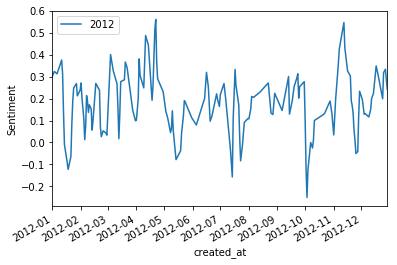

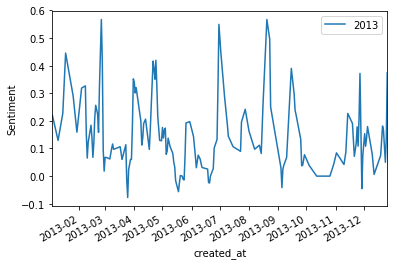

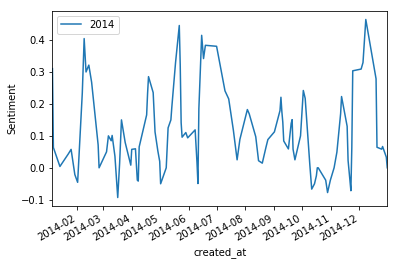

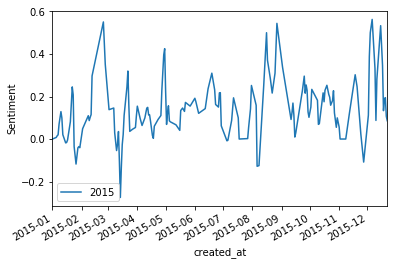

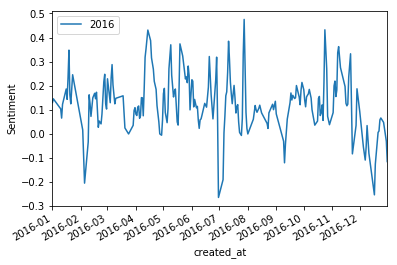

In [27]:
for i in year:
    ax = result.trend[i].plot()
    ax.legend([i])
    ax.set_ylabel('Sentiment')

In [28]:
trend = result.trend.dropna()

In [29]:
# Autocorrelation

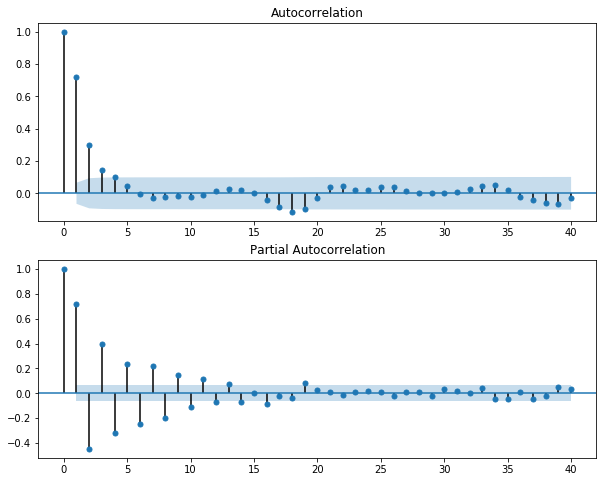

In [30]:
import statsmodels.api as sm
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(trend, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(trend, lags=40, ax=ax2)

In [31]:
# We choose the ARIMA model to describe the time series

In [32]:
for j in range(0,5):
    for k in range(0,5):
        print("(p,d,q) = (",j,0,k,")")
        try:
            arma = sm.tsa.ARMA(trend, (j,k)).fit(disp=False)
            print(arma.aic, arma.bic, arma.hqic)
        except:
            print('Error')

(p,d,q) = ( 0 0 0 )
-1104.2451217627336 -1094.6492409367836 -1100.578643019295
(p,d,q) = ( 0 0 1 )
-2107.559586784881 -2093.165765545956 -2102.059868669723
(p,d,q) = ( 0 0 2 )
Error
(p,d,q) = ( 0 0 3 )
Error
(p,d,q) = ( 0 0 4 )
Error
(p,d,q) = ( 1 0 0 )
-1751.690952537209 -1737.297131298284 -1746.191234422051
(p,d,q) = ( 1 0 1 )


C:\Users\HoT\Anaconda3_2\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\HoT\Anaconda3_2\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


Error
(p,d,q) = ( 1 0 2 )
Error
(p,d,q) = ( 1 0 3 )
Error
(p,d,q) = ( 1 0 4 )
Error
(p,d,q) = ( 2 0 0 )
-1949.7383251670403 -1930.5465635151406 -1942.4053676801632
(p,d,q) = ( 2 0 1 )
Error
(p,d,q) = ( 2 0 2 )
Error
(p,d,q) = ( 2 0 3 )
Error
(p,d,q) = ( 2 0 4 )
Error
(p,d,q) = ( 3 0 0 )
-2103.17381454393 -2079.1841124790553 -2094.0076176853336
(p,d,q) = ( 3 0 1 )
Error
(p,d,q) = ( 3 0 2 )
Error
(p,d,q) = ( 3 0 3 )
Error
(p,d,q) = ( 3 0 4 )
Error
(p,d,q) = ( 4 0 0 )
-2199.398962437545 -2170.6113199596953 -2188.399526207229
(p,d,q) = ( 4 0 1 )
Error
(p,d,q) = ( 4 0 2 )
Error
(p,d,q) = ( 4 0 3 )
Error
(p,d,q) = ( 4 0 4 )
Error


In [33]:
for i in range(1,5):
    for j in range(0,5):
        for k in range(0,5):
            print("(p,d,q) = (",j,i,k,")")
            try:
                arma = sm.tsa.ARMA(trend.diff(periods=i).dropna(), (j,k)).fit(disp=False)
                print(arma.aic, arma.bic, arma.hqic)
            except:
                print('Error')

(p,d,q) = ( 0 1 0 )
-1616.501200023417 -1606.9075525868673 -1612.8353784122046
(p,d,q) = ( 0 1 1 )
-2195.8973330346394 -2181.506861879815 -2190.398600617821
(p,d,q) = ( 0 1 2 )


C:\Users\HoT\Anaconda3_2\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\HoT\Anaconda3_2\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


-2205.619371003157 -2186.432076130058 -2198.2877277807324
(p,d,q) = ( 0 1 3 )
Error
(p,d,q) = ( 0 1 4 )
Error
(p,d,q) = ( 1 1 0 )
-1669.0498829391868 -1654.6594117843622 -1663.5511505223685
(p,d,q) = ( 1 1 1 )
-2195.0494383017462 -2175.862143428647 -2187.7177950793216
(p,d,q) = ( 1 1 2 )
Error
(p,d,q) = ( 1 1 3 )
Error
(p,d,q) = ( 1 1 4 )
Error
(p,d,q) = ( 2 1 0 )
-2006.0691208514386 -1986.881825978339 -1998.7374776290142
(p,d,q) = ( 2 1 1 )
-2406.498023330359 -2382.513904738985 -2397.3334693023285
(p,d,q) = ( 2 1 2 )
Error
(p,d,q) = ( 2 1 3 )
Error
(p,d,q) = ( 2 1 4 )
Error
(p,d,q) = ( 3 1 0 )
-2035.5707375145607 -2011.5866189231865 -2026.4061834865302
(p,d,q) = ( 3 1 1 )
-2404.600217807289 -2375.81927549764 -2393.6027529736525
(p,d,q) = ( 3 1 2 )
Error
(p,d,q) = ( 3 1 3 )
Error
(p,d,q) = ( 3 1 4 )
Error
(p,d,q) = ( 4 1 0 )
-2166.1567889131825 -2137.3758466035333 -2155.159324079546
(p,d,q) = ( 4 1 1 )
-2479.0542984155604 -2445.4765323876363 -2466.2239227763175
(p,d,q) = ( 4 1 2 )
Erro

C:\Users\HoT\Anaconda3_2\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\HoT\Anaconda3_2\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


-2330.639270436936 -2297.0771643708003 -2317.813503579736
(p,d,q) = ( 2 3 4 )
Error
(p,d,q) = ( 3 3 0 )
-1926.193932635873 -1902.2209997314903 -1917.0326705950156
(p,d,q) = ( 3 3 1 )
-2275.6782580135955 -2246.9107385283364 -2264.684743564567
(p,d,q) = ( 3 3 2 )


C:\Users\HoT\Anaconda3_2\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


-2342.1152776854965 -2308.553171619361 -2329.2895108282964
(p,d,q) = ( 3 3 3 )


C:\Users\HoT\Anaconda3_2\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


-2366.7230560319053 -2328.3663633848932 -2352.0650367665335
(p,d,q) = ( 3 3 4 )
Error
(p,d,q) = ( 4 3 0 )
-2155.400911983585 -2126.633392498326 -2144.4073975345564
(p,d,q) = ( 4 3 1 )
-2156.1316161775753 -2122.5695101114397 -2143.3058493203753
(p,d,q) = ( 4 3 2 )


C:\Users\HoT\Anaconda3_2\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


-2378.990811330143 -2340.634118683131 -2364.332792064771
(p,d,q) = ( 4 3 3 )


C:\Users\HoT\Anaconda3_2\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


-2375.6777903479774 -2332.526511120089 -2359.187518674434
(p,d,q) = ( 4 3 4 )


C:\Users\HoT\Anaconda3_2\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


-2525.2623577633053 -2477.31649195454 -2506.9398336815907
(p,d,q) = ( 0 4 0 )
-574.277860941146 -564.6909286759859 -570.6140157915397
(p,d,q) = ( 0 4 1 )
-1547.4142738261166 -1533.0338754283766 -1541.9185061017074
(p,d,q) = ( 0 4 2 )
Error
(p,d,q) = ( 0 4 3 )
Error
(p,d,q) = ( 0 4 4 )
Error
(p,d,q) = ( 1 4 0 )
-1153.5700516240572 -1139.1896532263172 -1148.074283899648
(p,d,q) = ( 1 4 1 )
Error
(p,d,q) = ( 1 4 2 )
Error
(p,d,q) = ( 1 4 3 )
Error
(p,d,q) = ( 1 4 4 )
Error
(p,d,q) = ( 2 4 0 )
-1541.2126484568003 -1522.0387839264802 -1533.8849581575878
(p,d,q) = ( 2 4 1 )
-1856.8236508555788 -1832.8563201926788 -1847.6640379815633
(p,d,q) = ( 2 4 2 )
Error
(p,d,q) = ( 2 4 3 )
Error
(p,d,q) = ( 2 4 4 )
Error
(p,d,q) = ( 3 4 0 )
-1539.3028531500072 -1515.3355224871073 -1530.1432402759917
(p,d,q) = ( 3 4 1 )
-1863.6145827518108 -1834.8537859563307 -1852.6230473029923
(p,d,q) = ( 3 4 2 )
Error
(p,d,q) = ( 3 4 3 )
Error
(p,d,q) = ( 3 4 4 )
Error
(p,d,q) = ( 4 4 0 )
-1602.6547960327994 -1573.893

In [34]:
# The best ARIMA model is (0,2,0)

In [35]:
arma = sm.tsa.ARMA(trend.diff(periods=2).dropna(), (0,0)).fit(disp=False)
print(arma.aic, arma.bic, arma.hqic)

-800.0018707386648 -790.4104591883178 -796.3367071024701


In [36]:
# Normal Test for the residuals

In [37]:
from scipy import stats
stats.normaltest(arma.resid)

NormaltestResult(statistic=22.215828538372666, pvalue=1.499319286017518e-05)

In [38]:
# QQ plot for the residuals

In [39]:
import statsmodels.api as sm

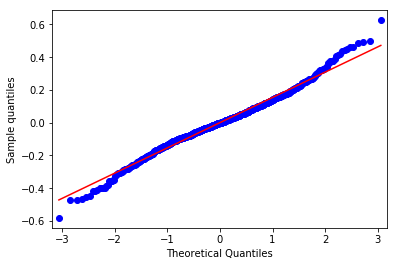

In [40]:
sm.qqplot(arma.resid,line='s')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample quantiles')
plt.show()